MY Github for this code
https://github.com/jitvimol/sentiment_analysis_vistec

In [1]:
#Load library
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,8))
import seaborn as sns
sns.set_style('whitegrid')
import datetime
from datetime import date

#ML class
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

## Other configurations

pd.options.display.float_format='{:,.3f}'.format

#pd.set_option('display.max_rows', 1000)

##from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import qgrid

from pycaret import nlp
from pycaret import classification
from pycaret import datasets
import re
import string

def beautifuldf(x):    
    return qgrid.show_grid(x,grid_options={'fullWidthRows': True,'syncColumnCellResize': True,
                                 'forceFitColumns': True,'rowHeight': 25,'enableColumnReorder': True,
                                 'enableTextSelectionOnCells': True,'editable': True})

import pythainlp
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words
from stop_words import get_stop_words

import nltk

# Prepare Stopword
nltk.download('words')
th_stop = tuple(thai_stopwords())
en_stop = tuple(get_stop_words('en'))
p_stemmer = PorterStemmer()

# Another stopword from pythainlp.corpus
from pythainlp.corpus import thai_stopwords

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

[nltk_data] Downloading package words to /home/blacklis/nltk_data...
[nltk_data]   Package words is already up-to-date!


<Figure size 1080x576 with 0 Axes>

In [2]:
### Define Functions
def clean_msg(msg):            
    msg = re.sub(r'<.*?>','', msg)  # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    msg = re.sub(r'#','',msg)   # ลบ hashtag    
    
    for c in string.punctuation:     # ลบ เครื่องหมายคำพูด (punctuation)
        msg = re.sub(r'\{}'.format(c),'',msg)
        
    msg = ' '.join(msg.split())  # ลบ separator เช่น \n \t
    return msg

#Text Process for logistic regression

import emoji

def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep, text)

def ungroup_emoji(toks):
    res = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            for char in tok:
                res.append(char)
        else:
            res.append(tok)
    return res

def process_text(text):
    #pre rules
    res = text.lower().strip()
    res = replace_url(res)
    res = replace_rep(res)
    
    #tokenize
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    
    #post rules
    res = ungroup_emoji(res)
    
    return res

#Function for split words (tokenize)

def split_word(text):
    tokens = word_tokenize(text,engine='newmm')
    
    tokens_temp=[]
    for i in tokens:
        w_syn = wordnet.synsets(i)
        if (len(w_syn)>0) and (len(w_syn[0].lemma_names('tha'))>0):
            tokens_temp.append(w_syn[0].lemma_names('tha')[0])
        else:
            tokens_temp.append(i)
    
    tokens = tokens_temp
    
    # ลบตัวเลข
    #tokens = [i for i in tokens if not i.isnumeric()]
    
    # ลบช่องว่าง
    tokens = [i for i in tokens if not ' ' in i]
    
    return tokens

# My code
#Apply Word Tokenize + Remove blank space to "train"

def my_split_word(text):
    tokens = word_tokenize(text,engine='newmm')
    tokens = [i for i in tokens if not ' ' in i]
    return tokens

def my_split_word_space(text):
    tokens = word_tokenize(text,engine='newmm')
    tokens = [i for i in tokens if not ' ' in i]
    tokens_string = ' '.join(tokens)
    return tokens_string

# =====My original tokenize word code======
# for i in range(train.shape[0]):
#     temp = []
#     train['texts'][i]
#     temp = word_tokenize(train['texts'][i], engine='newmm')
#     print(temp)
#     temp = [x for x in temp if x != ' ']
#     print(temp)
#     temp1 = " ".join(temp)    
#     train['texts'][i] = temp1

### Load Data

In [3]:
#LOAD DATA
train = pd.read_csv('./train/train.csv')
test = pd.read_csv('./test/test.csv')
print("Size of train data = ",len(train))
train.sample(5)

Size of train data =  10330


,texts,destination
558,จ่ายเงินทรูมูฟเรียบร้อยแล้วใช่มั้ย,billing and payment
2636,ผมอยากทราบ ว่าผมใช้ อินเตอร์เน็ต เป็นแบบไหนครับ,billing and payment
4612,พี่ครับ อยากเปลี่ยนโปรโมชั่นครับ,promotions
9120,สมัคร ไวไฟ ร่วมกับเบอร์ ล็อคอินไวไฟไม่ได้ระบบแ...,internet
9976,บัตรทรูมันนี่มันเติมเงินไม่ได้ครับ,true money


### Visualize

<AxesSubplot:xlabel='destination', ylabel='count'>

Text(0.5, 0, 'Category')

Text(0.5, 1.0, 'CountPlot')

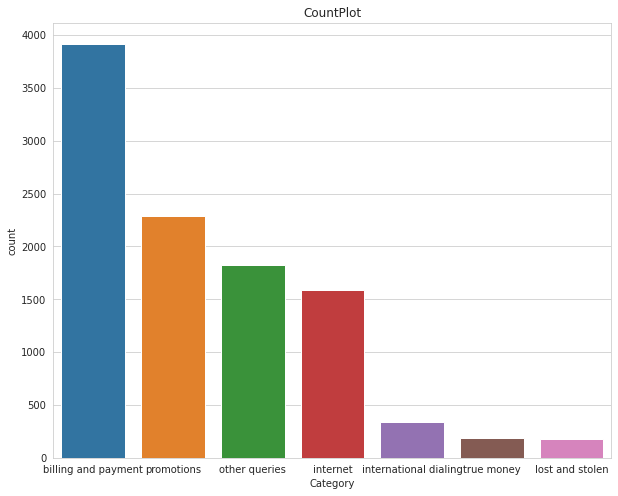

In [43]:
sns.countplot(train['destination'])
plt.xlabel('Category')
plt.title('CountPlot')

### Clean text 

In [4]:
# Clean text  remove <> , hashtag , "", separator
train['texts'] = train['texts'].apply(lambda x : clean_msg(x))

### Clean typo with normalize pythainpl

In [5]:
#Fix typo (with normalize pythainpl)
from pythainlp.util import normalize

print(color.BOLD + "Fix typo (with normalize pythainpl) & Display sample result\n" + color.END)

for index in range(len(train)):
    temp = normalize(train.iloc[index]['texts'])
    if temp != train.iloc[index]['texts']:
        print("[",index,"]", "Original :", train.iloc[index]['texts'])
        print(index, "Revised :", temp ,"\n")
        train.iloc[index]['texts'] = temp

Fix typo (with normalize pythainpl) & Display sample result

[ 2113 ] Original : ทำไมเวลาผมใช้่บริการสายจะตัดที่ วินาทีตลอดเลย ช่้วยตรวจสอบด้ัวยครับ ผมโทรไปหา call center แต่แค่รับเรื่องไว้ ไม่มีตอบกลับเลย
2113 Revised : ทำไมเวลาผมใช่บริการสายจะตัดที่ วินาทีตลอดเลย ช้วยตรวจสอบดั้วยครับ ผมโทรไปหา call center แต่แค่รับเรื่องไว้ ไม่มีตอบกลับเลย 

[ 2949 ] Original : ทำไมเวลาผมใช้่บริการสายจะตัดที่ วินาทีตลอดเลย ช่้วยตรวจสอบด้ัวยครับ ผมโทรไปหาคอลเซนเตอร์แต่แค่รับเรื่องไว้ ไม่มีตอบกลับเลย
2949 Revised : ทำไมเวลาผมใช่บริการสายจะตัดที่ วินาทีตลอดเลย ช้วยตรวจสอบดั้วยครับ ผมโทรไปหาคอลเซนเตอร์แต่แค่รับเรื่องไว้ ไม่มีตอบกลับเลย 

[ 3085 ] Original : อยาก สอบถาม ที่ ชำระ บริการ ครั้งลา่สุด ชำระ ผ่านทางไหน
3085 Revised : อยาก สอบถาม ที่ ชำระ บริการ ครั้งล่าสุด ชำระ ผ่านทางไหน 

[ 5297 ] Original : ต้องการสอบถามโปรโมชั่นที่ใช่สําหรับไอโฟนค่ะ ว่ามีโปรโม่ชั่นไหนราคาเท่าไหร่บาง
5297 Revised : ต้องการสอบถามโปรโมชั่นที่ใช่สำหรับไอโฟนค่ะ ว่ามีโปรโม่ชั่นไหนราคาเท่าไหร่บาง 

[ 8417 ] Original : ทำไมๆ เน๊ตช้

### Remove thaistopword

In [6]:
# Demon using thaistopword from pythainlp
# Remove thai stopword from thai_stopwords list

import random

from pythainlp.corpus import thai_stopwords
stopwords = list(thai_stopwords())

train_clean = train.copy()
train_clean['texts'] = train_clean['texts'].apply(lambda x : my_split_word(x))

print(color.BOLD + "Display sample result of stopwords removal\n" + color.END)
for x in range(0,3):
    random_index = random.randrange(1,len(train_clean))
    print("Original :" , train_clean.iloc[random_index]['texts'])
    print("Output cut thai_stopwords : ", [i for i in train_clean.iloc[random_index]['texts'] if i not in stopwords],"\n")

# Remove thai stopword from thai_stopwords list
# for index in range(len(train_clean)):
#     stopwords = list(thai_stopwords())
#     train_clean.iloc[index]['texts'] = [i for i in train_clean.iloc[index]['texts'] if i not in stopwords]

Display sample result of stopwords removal

Original : ['สวัสดี', 'ค่ะ', 'พี่', 'อยาก', 'เปลี่ยนเป็น', 'แบบ', 'เติม', 'เงิน', 'ค่ะ']
Output cut thai_stopwords :  ['สวัสดี', 'พี่', 'เปลี่ยนเป็น', 'เติม', 'เงิน'] 

Original : ['สมัคร', 'โปร', 'บี', 'บี', 'หน่อย']
Output cut thai_stopwords :  ['สมัคร', 'โปร', 'บี', 'บี'] 

Original : ['สวัสดี', 'ค่ะ', 'จะ', 'รบกวน', 'สอบถาม', 'โปรโมชั่น', 'เติม', 'เงิน', 'มือถือ', 'ระบบ', 'เติม', 'เงิน', 'ค่ะ']
Output cut thai_stopwords :  ['สวัสดี', 'รบกวน', 'สอบถาม', 'โปรโมชั่น', 'เติม', 'เงิน', 'มือถือ', 'ระบบ', 'เติม', 'เงิน'] 



## Word Cloud

In [7]:
train_wordcloud = train.copy()
train_wordcloud['texts'] = train_wordcloud['texts'].apply(lambda x : my_split_word_space(x))

In [8]:
train_wordcloud

,texts,destination
0,โทรศัพท์ มีปัญหา โทร ออก ได้ แต่ เวลา คนอื่น โ...,billing and payment
1,สอบถาม เกี่ยวกับ การ โอน เงิน ของ ระบบ เติม เง...,billing and payment
2,แจ้ง เครื่อง ขัดข้อง พอดี ดู สัญญาณ ไม่ ได้ ค่ะ,billing and payment
3,สวัสดี ครับ คือ ผม อยาก ทราบ ยอด ค้าง ค่าบริกา...,billing and payment
4,พี่ ครับ ผม อยาก ทราบ ว่า ตอนนี้ ยอด ค้าง ของ ...,billing and payment
...,...,...
10325,คะ จะแจ้ง อา ยัติ ซิม คะ เนื่องจาก โทรศัพท์ หา...,lost and stolen
10326,มือถือ หาย ค่ะ,lost and stolen
10327,ครับ โทรศัพท์ หาย ครับ ต้อง การระงับ สัญญาณ,lost and stolen
10328,โทรศัพท์ หายนะ ค่ะ จะ รบกวน ให้ พี่ ค้นหา สัญญ...,lost and stolen


In [9]:
category_temp = train_clean['destination'].unique().tolist()

wordcloud_df = [x,x,x,x,x,x,x]
wordcloud = [x,x,x,x,x,x,x]
wordcloud_list = [x,x,x,x,x,x,x]

for i in range (0,7):
    wordcloud_df[i] = train_wordcloud[train_wordcloud['destination'] == category_temp[i]]    
    wordcloud[i] =""
    for x in range(0, wordcloud_df[i].shape[0]):
        wordcloud[i] = wordcloud[i] + " " + wordcloud_df[i].iloc[x]['texts']

In [10]:
def showwordcloud(text):
    from wordcloud import WordCloud
    wordcloud = WordCloud(font_path = "THSarabunNew.ttf",
                          relative_scaling = 0.3,
                          min_font_size=1,
                          background_color="white",
                          width=1024,
                          height=768,
                          colormap='plasma', 
                          scale=3,
                          font_step=4,
                        #   contour_width=3, 
                        #   contour_color='steelblue', 
                          collocations=False,
                          margin=2
                          ).generate(text)
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    return(fig.show())

In [11]:
# import time
# for i in range(0,7):
#     print(category_temp[i])
#     showwordcloud(wordcloud[i])

In [12]:
category_temp = train_clean['destination'].unique().tolist()
# for x in category_temp:
#     x
#     train_clean[train_clean['destination'] == x]['texts']

In [52]:
#Split sentence into list

for i in range (0,7):
    wordcloud_list[i] = wordcloud[i].split()

In [ ]:
import collections
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunNew.ttf')
mpl.rc('font',family = "TH Sarabun New", size = 12)
fig, ax = plt.subplots(figsize=(8, 8))

Displaying count of common word in billing and payment


<AxesSubplot:ylabel='words'>

Text(0.5, 1.0, 'Displaying common words in billing and payment')

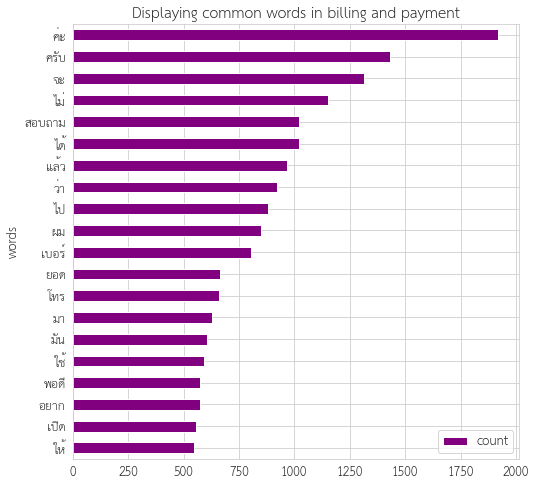

In [74]:
# Displaying count of common word in each category
print(color.BOLD + "Displaying count of common word in " + category_temp[0] +  color.END)
fig, ax = plt.subplots(figsize=(8, 8))
wordcloud_list_freq_0 = collections.Counter(wordcloud_list[0])
# wordcloud_list_freq_0.most_common(15)
wordcloud_list_df_0 = pd.DataFrame(wordcloud_list_freq_0.most_common(20),columns=['words', 'count'])

# Plot horizontal bar graph
wordcloud_list_df_0.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Displaying common words in " + category_temp[0])
plt.show()

Displaying count of common word in promotions


<AxesSubplot:ylabel='words'>

Text(0.5, 1.0, 'Displaying common words in promotions')

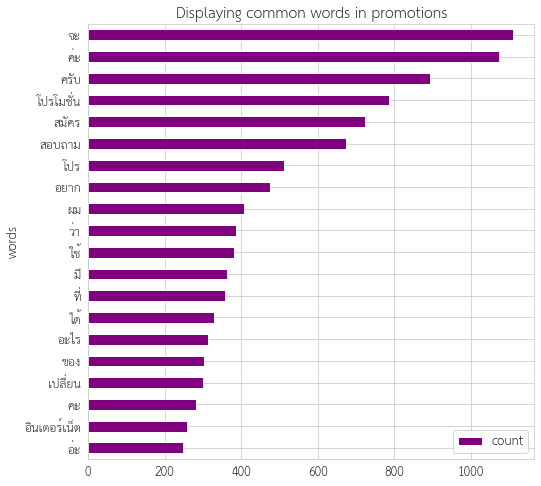

In [75]:
# Displaying count of common word in each category
print(color.BOLD + "Displaying count of common word in " + category_temp[1] +  color.END)
fig, ax = plt.subplots(figsize=(8, 8))
wordcloud_list_freq_1 = collections.Counter(wordcloud_list[1])
wordcloud_list_df_1 = pd.DataFrame(wordcloud_list_freq_1.most_common(20),columns=['words', 'count'])

# Plot horizontal bar graph
wordcloud_list_df_1.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Displaying common words in " + category_temp[1])
plt.show()

Displaying count of common word in true money


<AxesSubplot:ylabel='words'>

Text(0.5, 1.0, 'Displaying common words in true money')

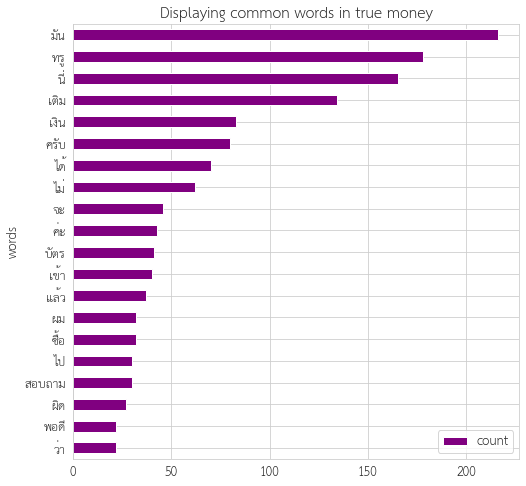

In [76]:
# Displaying count of common word in each category
print(color.BOLD + "Displaying count of common word in " + category_temp[5] +  color.END)
fig, ax = plt.subplots(figsize=(8, 8))
wordcloud_list_freq_5 = collections.Counter(wordcloud_list[5])
wordcloud_list_df_5 = pd.DataFrame(wordcloud_list_freq_5.most_common(20),columns=['words', 'count'])

# Plot horizontal bar graph
wordcloud_list_df_5.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Displaying common words in " + category_temp[5])
plt.show()

Displaying count of common word in lost and stolen


<AxesSubplot:ylabel='words'>

Text(0.5, 1.0, 'Displaying common words in lost and stolen')

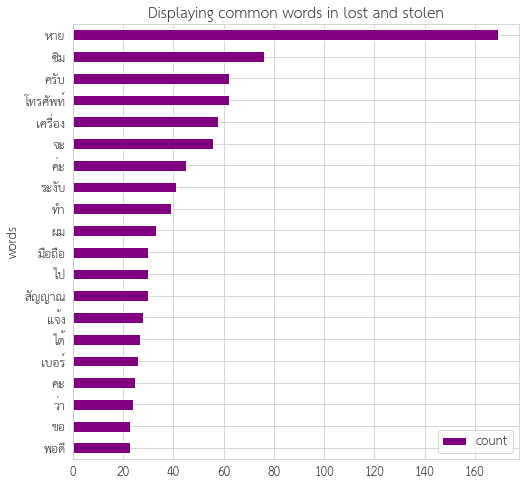

In [77]:
# Displaying count of common word in each category
print(color.BOLD + "Displaying count of common word in " + category_temp[6] +  color.END)
fig, ax = plt.subplots(figsize=(8, 8))
wordcloud_list_freq_6 = collections.Counter(wordcloud_list[6])
wordcloud_list_df_6 = pd.DataFrame(wordcloud_list_freq_6.most_common(20),columns=['words', 'count'])

# Plot horizontal bar graph
wordcloud_list_df_6.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Displaying common words in " + category_temp[6])
plt.show()

Displaying count of common word in international dialing


<AxesSubplot:ylabel='words'>

Text(0.5, 1.0, 'Displaying common words in international dialing')

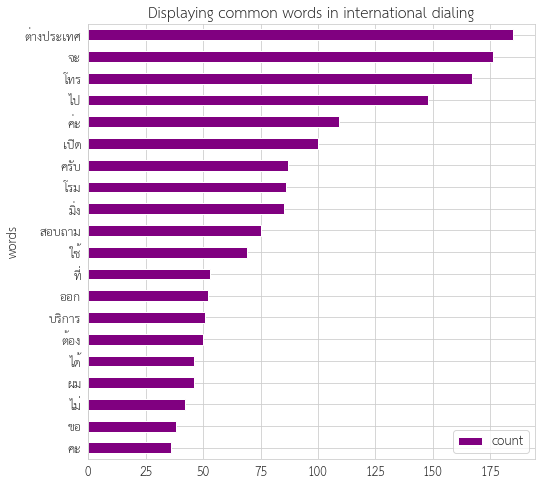

In [78]:
# Displaying count of common word in each category
print(color.BOLD + "Displaying count of common word in " + category_temp[4] +  color.END)
fig, ax = plt.subplots(figsize=(8, 8))
wordcloud_list_freq_4 = collections.Counter(wordcloud_list[4])
wordcloud_list_df_4 = pd.DataFrame(wordcloud_list_freq_4.most_common(20),columns=['words', 'count'])

# Plot horizontal bar graph
wordcloud_list_df_4.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Displaying common words in " + category_temp[4])
plt.show()

In [13]:
# Convert word list to sentence
train_clean1 = train_clean.copy()
train_clean1['texts'] = train_clean['texts'].map(lambda x: ' '.join(x))
train_clean1.sample(10)

,texts,destination
8288,พอดี พี่ ซื้อ โปรโมชั่น ใหม่ อะไร นะ ของ ณ เดช...,internet
8452,เพิ่ง ซื้อ golive s มา ให้ แต่ เปิด ใช้ บริการ...,internet
5384,อยาก สอบถาม เบอร์ xxxxxxxxx สมัคร แพ็กเกจ เพิ่...,promotions
9,ผม ไป เติม เงิน กด หมายเลข สลับ กัน ผิด อ่ะ ครับ,billing and payment
5493,internet k ที่ สมัคร ไว้ ใช้งาน หมด แล้ว สามาร...,promotions
5535,อยาก สอบถาม เกี่ยวกับ ซิม เล่น เน็ต น่ะ ค่ะ,promotions
6656,จะ ให้ เช็ค ราคา พอดี ทำ หน้าจอ ไอโฟน แตก อ่ะ ค่ะ,other queries
8361,พอดี ใช้ iPad ค่ะ แล้ว อยากรู้ เบอร์ โทร ค่ะ,internet
2898,ค่ะ ตอนนี้ ขอ สอบถาม วิธีการ ชำระเงิน ค่ะ,billing and payment
8153,กด สมัคร อินเตอร์เน็ต ไป แล้วแต่ ยัง ใช้งาน ไม...,internet


## Model 1 : TFIDF + Logistic Regression

In [14]:
# Remove customer-made stop word
train_clean_temp = train_clean.copy()

for index in range(len(train_clean)):
    mystopword = ['ค่ะ','ครับ','จะ','สวัสดี','พี่','ผม','สอบถาม',' ','','ไม่','ได้','ไม่ได้','ที่','อยาก','ขอ', 'มี', 'แล้ว', 'คะ','มัน', 'ใช้', 'ว่า','บี','ให้','ไป','มา','อ่ะ','แต่','พอดี', 'ทราบ','นี้' ,'ต้อง', 'ของ','เลย','หน่อย','เรื่อง','เข้า','เป็น','ต้องการ','เรา','อะไร','ทำไม','คือ','การ','อยู่']
    train_clean_temp.iloc[index]['texts'] = [i for i in train_clean.iloc[index]['texts'] if i not in mystopword]

In [15]:
# Convert word list to sentence
train_clean1['texts'] = train_clean_temp['texts'].map(lambda x: ' '.join(x))
train_clean1.sample(5)

,texts,destination
4594,เปลี่ยน โปรโมชั่น เมื่อวาน ติด ต่อมา เจ้าหน้า ...,promotions
8988,เท สส ปี ด เท สไม เน็ต ช้า,internet
5300,แพ็คเกจ iPhone ลดเหลือ ครึ่ง ราคา ใช้ได้ ถืง เ...,promotions
8735,ต่อ ทรู ไวไฟ,internet
3388,ชำระ ค่า ทรู ถูก ตัด และ อีก นาน มั้ย ถึง ใช้ได้,billing and payment


In [16]:
#Split train-test
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_clean1, test_size=0.15, random_state=260)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=None, lowercase=None, ngram_range=(1,2), min_df=20, sublinear_tf=True)
train_clean1['texts'] = train_clean1['texts'].astype(str)

tfidf_fit  = tfidf.fit(train_clean1['texts'])
text_train = tfidf_fit.transform(train_df['texts'])
text_valid = tfidf_fit.transform(valid_df['texts'])
text_test  = tfidf_fit.transform(test['texts'])
#text_train.shape, text_valid.shape

X_train = text_train.toarray()
X_valid = text_valid.toarray()
X_test = text_test.toarray()
y_train = train_df['destination']
y_valid = valid_df['destination']

#fit logistic regression models
model = LogisticRegression(C=2., penalty='l2', solver='liblinear', dual=False, multi_class='ovr')
#model = LogisticRegression(C=2,penalty='l2')
model.fit(X_train,y_train)
print("Model Score = ", round(model.score(X_valid,y_valid),3))

LogisticRegression(C=2.0, multi_class='ovr', solver='liblinear')

Model Score =  0.797


In [17]:
y_valid

0       billing and payment
1                  internet
2                  internet
3                promotions
4             other queries
               ...         
1545    billing and payment
1546    billing and payment
1547             promotions
1548    billing and payment
1549    billing and payment
Name: destination, Length: 1550, dtype: object

In [18]:
# Create prediction dataframe
probs = model.predict_proba(X_valid)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df['preds'] = model.predict(X_valid)
probs_df['destination'] = valid_df['destination']
probs_df['texts'] = valid_df.texts
probs_df['hit'] = (probs_df['preds']==probs_df['destination'])
print(color.BOLD + "Displaying processed train with prediction (preds column)" + color.END)
probs_df.sample(10)

from sklearn.metrics import f1_score
f1_score(y_valid, probs_df['preds'], average='micro')

Displaying processed train with prediction (preds column)


,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money,preds,destination,texts,hit
1432,0.143,0.034,0.126,0.027,0.605,0.059,0.006,other queries,other queries,จำ สาขา ไหน บ้าง ห น่ะ เอา เครื่อง ซ่อม ห น่ะ,True
1144,0.394,0.007,0.214,0.003,0.314,0.034,0.034,billing and payment,other queries,ได้รับ ข้อความ OTP รหัส คุณ รู้ มาจาก ไหน,False
270,0.405,0.003,0.041,0.005,0.130,0.224,0.192,billing and payment,true money,สามารถ เติม เงิน ด้วย ทรู นี่ การ์ด บน ไอแพด ว...,False
498,0.838,0.004,0.068,0.006,0.047,0.033,0.004,billing and payment,billing and payment,เออ นิดนึง เบอร์ เบอร์ อีก เบอร์ ถูก ระงับ การ...,True
1161,0.708,0.016,0.028,0.002,0.065,0.179,0.002,billing and payment,international dialing,ถาม นิดหนึ่ง ถ้า โปรโมชั่น sms อยู่แล้ว ถ้า ส่...,False
14,0.049,0.006,0.141,0.600,0.129,0.072,0.002,lost and stolen,lost and stolen,เอ่อ ทำ เอ่อ มือถือ หาย อะ เอ่อ เบอร์ เนี้ย เป...,True
508,0.868,0.012,0.002,0.001,0.030,0.086,0.000,billing and payment,billing and payment,เบอร์ ติด ค่าบริการ กี่ เดือน,True
1302,0.050,0.004,0.005,0.002,0.937,0.001,0.001,other queries,billing and payment,เบอร์ ถูก ยกเลิก นะ คับ,False
1096,0.039,0.013,0.071,0.002,0.120,0.741,0.014,promotions,promotions,ทรูมูฟ นี่ บริการ สมัคร อินเตอร์เน็ต ราย วันที...,True
275,0.984,0.004,0.001,0.001,0.006,0.003,0.001,billing and payment,billing and payment,หนังสือ ยัง ชำระ ค่าบริการ จ่าย,True


0.7974193548387096

Confusion Matrix
Model Score =  0.797


<AxesSubplot:>

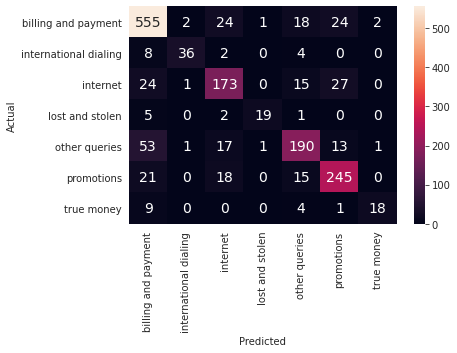

In [19]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
print(color.BOLD + "Confusion Matrix" + color.END)
conf_mat = confusion_matrix(probs_df['destination'],probs_df['preds'])
print("Model Score = ", round(model.score(X_valid,y_valid),3))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=model.classes_, yticklabels=model.classes_ , annot_kws={'size':14})
_=plt.ylabel('Actual')
_=plt.xlabel('Predicted')
_=plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

### Prediction with test dataset

In [20]:
# Create prediction dataframe
print(color.BOLD + "Display sample of prediction with test dataset" + color.END)
test_tf = tfidf_fit.transform(test['texts']).toarray()

probs = model.predict_proba(test_tf)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df['texts'] = test['texts']
probs_df['prediction'] = model.predict(test_tf)
probs_df.tail(10)

Display sample of prediction with test dataset


,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money,texts,prediction
1734,0.537,0.025,0.152,0.002,0.271,0.011,0.002,เผอิญชำระเงินไปแล้วครับ มันยังไม่เปิดคลื่นให้เ...,billing and payment
1735,0.844,0.018,0.114,0.001,0.010,0.012,0.002,ขอเปลี่ยนที่อยู่ในการส่งใบแจ้งค่าบริการ,billing and payment
1736,0.454,0.024,0.085,0.002,0.415,0.018,0.002,ขอเปิดบริการ ไอดีดี,billing and payment
1737,0.412,0.012,0.158,0.005,0.300,0.105,0.008,ดิฉันจะสอบถาม ดิฉันจะเปลี่ยนรอบบิลค่ะ,billing and payment
1738,0.412,0.012,0.158,0.005,0.300,0.105,0.008,สอบถามเรื่องเครื่องหาย,billing and payment
1739,0.441,0.008,0.124,0.003,0.266,0.148,0.010,ครับ คือผมไม่แน่ใจนะครับว่า message นี้มันเป็น...,billing and payment
1740,0.177,0.011,0.217,0.006,0.381,0.037,0.171,โทรไม่หาเบอร์ทรูนี่ล่ะค่ะ ไม่ถึง นาทีก็หลุดค่ะ...,other queries
1741,0.735,0.005,0.072,0.002,0.145,0.037,0.003,ฮัลโลครับ ทำไมเครื่องต่อเน็ตไม่ได้,billing and payment
1742,0.412,0.012,0.158,0.005,0.300,0.105,0.008,ต้องการยกเลิกเบอร์ค่ะ,billing and payment
1743,0.073,0.005,0.012,0.002,0.021,0.883,0.004,จะสอบถามเบอร์นี้มีแพ็คเกจอะไรบ้างค่ะ,promotions


### Prepare submission template

In [21]:
#Export result to csv file name submission.csv
print(color.BOLD + "Export result to submission.csv file" + color.END)
submission = probs_df[['texts', 'prediction']]
submission
submission.to_csv('submission.csv',index = False, encoding='utf-8')

Export result to submission.csv file


,texts,prediction
0,ค่ะ พี่ค่ะ คืออยู่ๆ เน็ตเล่นไม่ได้อ่ะค่ะ,internet
1,ครับผม อ่า ผมเปลี่นนซิมเป็น ซิมทรูมูฟเอชอ่ะครั...,billing and payment
2,ผมขอเช็คข้อมูล พึ่งชำระยอดเข้าไปแต่พนักงานแจ้ง...,other queries
3,จะสอบถามเรื่องทรูแบล็คการ์ดหน่ะครับ ไม่ทราบว่า...,billing and payment
4,อยากจะเช็คยอดการโทรค่ะ,billing and payment
...,...,...
1739,ครับ คือผมไม่แน่ใจนะครับว่า message นี้มันเป็น...,billing and payment
1740,โทรไม่หาเบอร์ทรูนี่ล่ะค่ะ ไม่ถึง นาทีก็หลุดค่ะ...,other queries
1741,ฮัลโลครับ ทำไมเครื่องต่อเน็ตไม่ได้,billing and payment
1742,ต้องการยกเลิกเบอร์ค่ะ,billing and payment


### Export Model

In [22]:
import pickle
filename='logistic_model.pkl'
pickle.dump(model, open(filename, 'wb'))

## load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

## Redo Model 1 + using Thaistopwords module from PythaiNLP.corpus

In [23]:
from pythainlp.corpus import thai_stopwords
stopwords = list(thai_stopwords())

In [24]:
# Remove stopword from PythaiNLP.corpus module
train_clean_temp = train_clean.copy()

for index in range(len(train_clean)):
    train_clean_temp.iloc[index]['texts'] = [i for i in train_clean.iloc[index]['texts'] if i not in stopwords]

In [25]:
# Convert word list to sentence
train_clean1['texts'] = train_clean_temp['texts'].map(lambda x: ' '.join(x))
train_clean1.sample(5)

,texts,destination
6574,บริการ ทรูมูฟ บริการ ห,other queries
4893,โปร แพ็ค เก็จ เน็ต,promotions
1210,เครือข่าย ทรูมูฟ โอน เงิน,billing and payment
624,ชำระ ยอด สัญญาณ,billing and payment
8405,ต้องการ โอน สาย,internet


In [26]:
#Split train-test
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_clean1, test_size=0.15, random_state=260)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=None, lowercase=None, ngram_range=(1,2), min_df=20, sublinear_tf=True)
train_clean1['texts'] = train_clean1['texts'].astype(str)

tfidf_fit  = tfidf.fit(train_clean1['texts'])
text_train = tfidf_fit.transform(train_df['texts'])
text_valid = tfidf_fit.transform(valid_df['texts'])
text_test  = tfidf_fit.transform(test['texts'])
#text_train.shape, text_valid.shape

X_train = text_train.toarray()
X_valid = text_valid.toarray()
X_test = text_test.toarray()
y_train = train_df['destination']
y_valid = valid_df['destination']

#fit logistic regression models
model = LogisticRegression(C=2., penalty='l2', solver='liblinear', dual=False, multi_class='ovr')
#model = LogisticRegression(C=2,penalty='l2')
model.fit(X_train,y_train)
print("Model Score = ", round(model.score(X_valid,y_valid),3))

LogisticRegression(C=2.0, multi_class='ovr', solver='liblinear')

Model Score =  0.797


In [27]:
# Create prediction dataframe
probs = model.predict_proba(X_valid)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df['preds'] = model.predict(X_valid)
probs_df['category'] = valid_df['destination']
probs_df['texts'] = valid_df.texts
probs_df['hit'] = (probs_df['preds']==probs_df.category)
print(color.BOLD + "Displaying processed train with prediction (preds column)" + color.END)
probs_df.sample(10)

Displaying processed train with prediction (preds column)


,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money,preds,category,texts,hit
908,0.159,0.003,0.792,0.001,0.037,0.007,0.001,internet,internet,สัญญาณ อินเตอร์เน็ต เล่น หง่ะ,True
143,0.815,0.003,0.010,0.001,0.129,0.040,0.003,billing and payment,billing and payment,สอบถาม สงสัย จ่าย ชำระเงิน เช็ค เกรง เช็ค ตีกล...,True
113,0.464,0.015,0.216,0.012,0.201,0.084,0.008,billing and payment,billing and payment,เอ่อ ผม ต้องการ สอบถาม ตอนนี้ มือถือ ผม ระงับ ...,True
829,0.977,0.006,0.001,0.001,0.007,0.006,0.002,billing and payment,billing and payment,พี่ สอบถาม ค่าบริการ ชำระ ยอด,True
1008,0.008,0.001,0.000,0.001,0.001,0.987,0.001,promotions,promotions,โปรโมชั่น,True
802,0.184,0.008,0.341,0.014,0.411,0.038,0.004,other queries,other queries,ต้องการ โอน สาย กรณี ลืม โทรศัพท์ บ้าน,True
347,0.521,0.006,0.179,0.018,0.198,0.059,0.020,billing and payment,other queries,สอบถาม ตรวจสอบ หมายเลข ทรู เครื่อง นึง อ่ะ เผอ...,False
263,0.040,0.004,0.616,0.000,0.012,0.326,0.001,internet,internet,สอบถาม นะคะ สักครู่ สมัคร โปร อินเตอร์เน็ต ตั้...,True
960,0.087,0.012,0.161,0.004,0.507,0.224,0.006,other queries,promotions,สวัสดี สอบถาม เรื่อง ตอนนี้ True Move ธรรมดา เ...,False
517,0.557,0.004,0.127,0.001,0.028,0.028,0.255,billing and payment,billing and payment,สอบถาม รหัส เติม เงิน,True


Confusion Matrix
Model Score =  0.797


<AxesSubplot:>

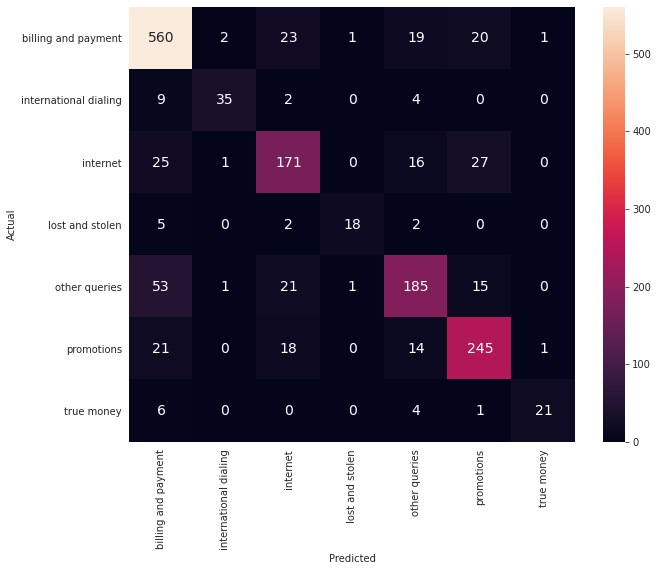

In [28]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
print(color.BOLD + "Confusion Matrix" + color.END)
conf_mat = confusion_matrix(probs_df['category'],probs_df['preds'])
print("Model Score = ", round(model.score(X_valid,y_valid),3))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=model.classes_, yticklabels=model.classes_ , annot_kws={'size':14})
_=plt.ylabel('Actual')
_=plt.xlabel('Predicted')
_=plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

### Prediction with test dataset

In [29]:
# Create prediction dataframe
print(color.BOLD + "Display sample of prediction with test dataset" + color.END)
test_tf = tfidf_fit.transform(test['texts']).toarray()

probs = model.predict_proba(test_tf)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df['texts'] = train['texts']
probs_df['prediction'] = model.predict(test_tf)
probs_df.sample(10)

Display sample of prediction with test dataset


,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money,texts,prediction
1209,0.465,0.008,0.030,0.003,0.183,0.176,0.134,สวัสดีครับ รบกวนสอบถามเกี่ยวกับใบแจ้งค่าบริการ...,billing and payment
1107,0.453,0.009,0.051,0.011,0.439,0.035,0.002,รายละเอียดบิล,billing and payment
1101,0.801,0.005,0.066,0.005,0.074,0.047,0.002,จะสอบถามเรื่อง ชมอินเตอร์เน๊ตค่ะ,billing and payment
1424,0.170,0.004,0.030,0.002,0.661,0.131,0.003,สอบถามเกี่ยบกับการเติมเงินนิดนึงครับ,other queries
1243,0.204,0.006,0.130,0.003,0.407,0.114,0.136,ของคุณนริศหนะครับ เหลือค่าชำระเท่าไหร่ครับ,other queries
1127,0.392,0.009,0.174,0.006,0.179,0.225,0.015,ผมอยากทราบว่าเงินเหลือ บาท ทำไมถึงโทรออกไม่ได้,billing and payment
1308,0.272,0.007,0.418,0.006,0.261,0.034,0.002,เบอร์ผมมันเล่น G ไม่ได้ เบอร์ผมมันถูกระงับหน่ะ,internet
1647,0.053,0.005,0.789,0.001,0.030,0.122,0.001,พี่ค่ะ มันโดนระงับสัญญาณค่ะ,internet
128,0.114,0.005,0.109,0.003,0.719,0.010,0.041,คะ เออ จะสอบถามนิดนึง มีเบอร์ เบอร์อีกเบอร์ของ...,other queries
1268,0.046,0.006,0.085,0.002,0.837,0.016,0.008,พอดีซิมอันนึงผมไม่ได้ใช้นานแล้วแล้วผมไปเติมเงิ...,other queries


## Model 2 : kmeans

In [30]:
from sklearn.cluster import KMeans
train2 = train.copy()
train2['texts'] = train2['texts'].apply(lambda x : my_split_word(x))

# Using Thaistopwords module

for index in range(len(train2)):
    stopwords = list(thai_stopwords())
    train2.iloc[index]['texts'] = [i for i in train2.iloc[index]['texts'] if i not in stopwords]

# Convert word list to sentence
train2['texts'] = train2['texts'].map(lambda x: ' '.join(x))

#texts = train2['texts'].tolist()

#Represent each article as a vector
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = None, ngram_range = (1,3))
vec.fit(train2['texts'])
features = vec.transform(train2['texts'])

from sklearn.cluster import MiniBatchKMeans, KMeans
clust = KMeans(init='k-means++', n_clusters=7, n_init=10)
clust.fit(features)

train2['predict']=clust.labels_
train2.sample(10)
#yhat = clust.predict(features)
#train2['predict']=yhat
#print(clust.predict(X_test))

TfidfVectorizer(ngram_range=(1, 3))

KMeans(n_clusters=7)

,texts,destination,predict
4138,สอบถาม โปร โม ชั้น เบอร์ โปร เหรอ,promotions,0
3840,สวัสดี ผม อยากรู้ เบอร์ สมัคร package internet...,billing and payment,0
2634,ตอนนี้ ใช้งาน หมายเลข,billing and payment,0
9020,ต้องการ สอบถาม แพคเกจ ไวไฟ,internet,0
1584,สอบถาม เรื่อง check ยอดเงิน check ซื้อ SIM,billing and payment,0
527,สอบถาม คั่ เบอร์ ชื่อ สุชา วดี ชั่ง รอ เบอร์ ย...,billing and payment,0
939,เมื่อกี้ ผม ทำ รายการ ไม แจ้ง นึง ทำ รายการ เต...,billing and payment,0
2490,น้อง สอบถาม เบอร์ ค่า โทร เช็ค เหลือประมาณ กี่...,billing and payment,0
2109,ค่าบริการ,billing and payment,6
9864,แฟน ผม เดินทาง อิตาลี โรม มิ่ง,international dialing,0


In [31]:
category_KMEAN = [ 'billing and payment', 'international dialing','other queries', 'lost and stolen', 'internet' , 'true money', 'promotions']
for x in range(0,len(category_KMEAN)):
    train2.loc[train2['predict'] == x , 'predict' ]= category_KMEAN[x]

In [32]:
train2.head(1)

,texts,destination,predict
0,โทรศัพท์ มีปัญหา โทร เวลา คนอื่น โทร เข้ามา โทร,billing and payment,international dialing


In [33]:
# Find category topic based on category value

# After evaluate the result, we create category_KNN per below :

for x in range(0,7):
    print("category : ", x," | ",category_KMEAN[x] )
    train2[train2['predict'] == category_KMEAN[x]]['destination'].value_counts().nlargest(4)
    
print(color.BOLD + "We see that KNN doesn't classify category international dialing well" + color.END)

category :  0  |  billing and payment


billing and payment    2626
promotions             1524
other queries          1139
internet               1129
Name: destination, dtype: int64

category :  1  |  international dialing


billing and payment    442
lost and stolen         74
other queries           62
internet                54
Name: destination, dtype: int64

category :  2  |  other queries


internet               381
promotions             325
billing and payment     97
other queries           65
Name: destination, dtype: int64

category :  3  |  lost and stolen


other queries          506
promotions              18
billing and payment      4
internet                 2
Name: destination, dtype: int64

category :  4  |  internet


billing and payment    260
true money              83
promotions              74
other queries           26
Name: destination, dtype: int64

category :  5  |  true money


promotions             295
billing and payment     21
other queries            2
internet                 1
Name: destination, dtype: int64

category :  6  |  promotions


billing and payment      469
international dialing     28
other queries             26
promotions                22
Name: destination, dtype: int64

We see that KNN doesn't classify category international dialing well


In [34]:
# Create column "hit" do visualize accuracy
    
train2['hit'] = (train2['destination'] == train2['predict'])
train2['hit'].value_counts()
train2.sample(10)

print(color.BOLD + "Stop modeling KNN classifier with topic modeling due to low accuracy " + color.END)

False    7585
True     2745
Name: hit, dtype: int64

,texts,destination,predict,hit
3999,สมัคร โปร ข้อความ,promotions,billing and payment,False
4165,ต้องการ สมัคร สาม จี,promotions,billing and payment,False
6267,ลูกค้า สอบถาม ยกเลิก บริการ เบอร์ มือถือ,other queries,billing and payment,False
797,สอบถาม เบอร์ โดน ระงับ สัญญาณ เพรา,billing and payment,billing and payment,True
4954,สมัคร แพ็คเกจ รึเปล่า ค่า เครื่อง คืน แพ็คเกจ ...,promotions,billing and payment,False
4911,ทราบ รายการ โปรโมชั่น ทรูมูฟ โปรโมชั่น,promotions,true money,False
1231,สัญญาณ วงเงิน ชั่วคราว,billing and payment,billing and payment,True
8257,สอบถาม เรื่อง เซ็ท จี พีอาร์ เอส เครื่อง,internet,billing and payment,False
6095,สอบถาม โปรโมชั่น,promotions,true money,False
7508,ผม ทำการ ย้าย เครือข่าย ทีนี้ ติดต่อ ทรูมูฟ โท...,other queries,billing and payment,False


Stop modeling KNN classifier with topic modeling due to low accuracy 


## Using SVM and Naive-Bayes

In [35]:
# https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

In [36]:
train_clean1 = train_clean.copy()
# train_clean1['texts'] = train_clean['texts'].map(lambda x: ' '.join(x))
# train_clean1.sample(5)
train_clean1

,texts,destination
0,"[โทรศัพท์, มีปัญหา, โทร, ออก, ได้, แต่, เวลา, ...",billing and payment
1,"[สอบถาม, เกี่ยวกับ, การ, โอน, เงิน, ของ, ระบบ,...",billing and payment
2,"[แจ้ง, เครื่อง, ขัดข้อง, พอดี, ดู, สัญญาณ, ไม่...",billing and payment
3,"[สวัสดี, ครับ, คือ, ผม, อยาก, ทราบ, ยอด, ค้าง,...",billing and payment
4,"[พี่, ครับ, ผม, อยาก, ทราบ, ว่า, ตอนนี้, ยอด, ...",billing and payment
...,...,...
10325,"[คะ, จะแจ้ง, อา, ยัติ, ซิม, คะ, เนื่องจาก, โทร...",lost and stolen
10326,"[มือถือ, หาย, ค่ะ]",lost and stolen
10327,"[ครับ, โทรศัพท์, หาย, ครับ, ต้อง, การระงับ, สั...",lost and stolen
10328,"[โทรศัพท์, หายนะ, ค่ะ, จะ, รบกวน, ให้, พี่, ค้...",lost and stolen


In [37]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(train_clean1['texts'],train_clean1['destination'],test_size=0.3)

In [38]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000,lowercase=False,tokenizer=None, sublinear_tf=True)
Tfidf_vect.fit(train_clean1['texts'].astype(str))
Train_X_Tfidf = Tfidf_vect.transform(Train_X.astype(str))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.astype(str))

TfidfVectorizer(lowercase=False, max_features=5000, sublinear_tf=True)

In [39]:
print(Tfidf_vect.vocabulary_)

{'โทรศ': 2140, 'พท': 1241, 'ญหา': 882, 'โทร': 2138, 'ออก': 1720, 'ได': 2211, 'แต': 2035, 'เวลา': 1974, 'คนอ': 705, 'เข': 1857, 'ามา': 1807, 'ไม': 2226, 'คร': 710, 'สอบถาม': 1579, 'เก': 1847, 'ยวก': 1371, 'การ': 628, 'โอน': 2180, 'เง': 1870, 'ของ': 675, 'ระบบ': 1411, 'เต': 1890, 'ไป': 2218, 'หมายเลข': 1631, 'หน': 1618, 'แจ': 2025, 'เคร': 1863, 'อง': 1661, 'ดข': 893, 'พอด': 1258, 'ญญาณ': 877, 'สว': 1574, 'สด': 1543, 'ผม': 1234, 'อยาก': 1706, 'ทราบ': 1021, 'ยอด': 1375, 'าง': 1765, 'าบร': 1804, 'งหมด': 786, 'ตอนน': 975, 'เท': 1893, 'าไหร': 1840, 'ขอ': 673, 'เพ': 1922, 'วงเง': 1479, 'จะ': 828, 'ถาม': 1006, 'ใช': 2188, 'งาน': 793, 'นะ': 1111, 'วย': 1496, 'เช': 1876, 'เบอร': 1912, 'เพราะอะไร': 1929, 'คะ': 746, 'sms': 510, 'ใบ': 2195, 'กล': 602, 'กด': 579, 'สล': 1573, 'ให': 2202, 'เป': 1914, 'อย': 1701, 'งส': 783, 'มา': 1315, 'ชำระ': 866, 'าย': 1809, 'แล': 2087, 'ใน': 2191, 'ยอดเง': 1379, 'หว': 1641, 'บผม': 1156, 'อน': 1680, 'งวด': 781, 'เด': 1885, 'ยว': 1370, 'พร': 1247, 'งน': 775, 'ตร': 948,

In [40]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

print(classification_report(Test_Y,predictions_NB))

MultinomialNB()

Naive Bayes Accuracy Score ->  70.53888351080994
              precision    recall  f1-score   support

           0       0.64      0.94      0.76      1217
           1       1.00      0.16      0.27       101
           2       0.81      0.46      0.59       483
           3       1.00      0.02      0.03        57
           4       0.82      0.53      0.64       538
           5       0.76      0.80      0.78       650
           6       0.00      0.00      0.00        53

    accuracy                           0.71      3099
   macro avg       0.72      0.41      0.44      3099
weighted avg       0.73      0.71      0.68      3099



### Using SVM

In [41]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

print(classification_report(Test_Y,predictions_SVM))

SVC(gamma='auto', kernel='linear')

SVM Accuracy Score ->  80.83252662149081
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1217
           1       0.92      0.78      0.84       101
           2       0.79      0.72      0.75       483
           3       0.81      0.81      0.81        57
           4       0.76      0.71      0.74       538
           5       0.82      0.84      0.83       650
           6       0.91      0.57      0.70        53

    accuracy                           0.81      3099
   macro avg       0.83      0.76      0.79      3099
weighted avg       0.81      0.81      0.81      3099



In [42]:
print(predictions_SVM_test_df.__class__)

NameError: name 'predictions_SVM_test_df' is not defined

In [ ]:
# Create prediction dataframe
Test_df_Tfidf = Tfidf_vect.transform(test['texts'].astype(str))
predictions_SVM_test_df = SVM.predict(Test_df_Tfidf)

predictions_SVM_test_df.predict_proba(Test_X_Tfidf)


# print(color.BOLD + "Display sample of prediction with test dataset" + color.END)
# Test_X_Tfidf = Tfidf_vect.transform(test['texts'].astype(str))

# probs = model.predict_proba(Test_X_Tfidf)
# probs_df = pd.DataFrame(probs)
# probs_df.columns = model.classes_
# probs_df['texts'] = test['texts']
# probs_df['prediction'] = model.predict(Test_X_Tfidf)
# probs_df.sample(10)

## Another LDA (Thai)

In [ ]:
# https://datadairy.blogspot.com/2019/06/lda-topic-modeling.html

In [ ]:
import pandas as pd
import numpy as np
import time
from pymongo import MongoClient
from bson.objectid import ObjectId
import import_ipynb
#import utilities.config as config
import datetime
import calendar
import scipy.stats
from datetime import timedelta, date
import pytz
from pytz import timezone
import multiprocessing
from multiprocessing import cpu_count #For Parallel
from IPython.display import clear_output

cores = cpu_count() #Number of CPU cores on your system
partitions = cores #Define as many partitions as you want to run parallel

stopwords = list(thai_stopwords()) 

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def parallelize(data, func):
    data_split = np.array_split(data, partitions)
    pool = multiprocessing.Pool(cores)     #สร้าง multiprocessor จำนวนเท่ากับ core cpu ของ server
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

#ตัดคำ
def preprocess(text):
    result = []
    global progress
    progress = progress + 1
    if(progress % 250 == 0):
        clear_output()
        printProgressBar (progress, allLen, 0,0, '','', 1,100, '█')
        
    for token in word_tokenize(text,engine='newmm'): 
        token = token.strip()
#         if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >5 :
#             result.append(lemmatize_stemming(token))
        
        mystopword = ['ค่ะ','ครับ','จะ','สวัสดี','พี่','ผม','สอบถาม',' ','','ไม่','ได้','ไม่ได้','ที่','อยาก','ขอ', 'มี', 'แล้ว', 'คะ','มัน', 'ใช้', 'ว่า','บี','ให้','ไป','มา','อ่ะ','แต่','พอดี', 'ทราบ','นี้' ,'ต้อง', 'ของ','เลย','หน่อย','เรื่อง','เข้า','เป็น','ต้องการ','เรา','อะไร','ทำไม','คือ','การ','อยู่']
        if token not in mystopword:
            result.append(lemmatize_stemming(token)) 

#         stopwords.append("สวัสดี")
#         if token not in stopwords and len(token) > 4 :
#             result.append(lemmatize_stemming(token))  

#         result.append(lemmatize_stemming(token))  
            
#     for token in word_tokenize(text,engine='newmm'): 
#         token = token.strip()
#     stopwords = list(thai_stopwords())    
#     result = [i for i in text if i not in stopwords]
    return result

def func(documents):
    res = documents['headline_text'].map(preprocess)
    return res

def cleanText(documents):
    documents['headline_text'] = documents['headline_text'].str.replace('|',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\\',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\/',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('.',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('_','')
    documents['headline_text'] = documents['headline_text'].str.replace('\d+', '')
    documents['headline_text'] = documents['headline_text'].str.replace('-',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    pattern = '|'.join(['&', '%', ';', '='])
    documents['headline_text'] = documents['headline_text'].str.replace(pattern, ' ')
    documents = documents.loc[~documents['headline_text'].str.contains("img")]
    documents.headline_text.replace({r"[a-zA-Z]+":''}, regex=True, inplace=True)
    documents['headline_text'] = documents['headline_text'].str.replace(':',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('#',' ')
    documents['headline_text'] = documents['headline_text'].str.strip()
    documents = documents.loc[documents['headline_text']!= ""]
    documents = documents.dropna().reset_index(drop=True)
    return documents

In [ ]:
documents = train.copy()
documents = documents.rename(columns={'texts':'headline_text'})

In [ ]:
documents = parallelize(documents,cleanText)
documents.head()
documents.shape

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2020)
import nltk
from pythainlp.tokenize import word_tokenize

In [ ]:
documents

In [ ]:
allLen = documents.shape[0]
progress = 0
# Print iterations progress
def printProgressBar (iteration, total,mode = 0,current_percent = 0, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█'):
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    if mode == 0 :
        filledLength = int(length * iteration // total)
        bar = fill * filledLength + '-' * (length - filledLength)
        print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = '\r')
        # Print New Line on Complete
        if iteration == total:
            print()
    elif mode == 1:
        if current_percent != round(float(percent),1):
            current_percent = round(float(percent),1)
            print(percent+"%")
        return current_percent
    return 0

In [ ]:
documents

In [ ]:
stemmer = PorterStemmer()
processed_docs = parallelize(documents,func)# preprocess, ['headline_text']

In [ ]:
processed_docs.sample(10)

# x=890     
# documents.iloc[x]['headline_text']
# processed_docs.iloc[x]

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
len(dictionary)

In [ ]:
# ตัดคำฟุ่มเฟือยออก โดยลบคำที่ปรากฏบ่อยเกิน 50% และให้เหลือไปถึง1พันคำ
#dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=1000)  #reduce to 1K word
#len(dictionary)

In [ ]:
# Gensim doc2bow
# For each document we create a dictionary reporting how many
# words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

# run LDA แบ่งคำออกเป็น9กลุ่ม โดยใช้ cpu ทุกตัว (serverที่เราใช้มี32cpu)
#worker = cpu core amount -1
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=7, id2word=dictionary, passes=2, workers=31)

# For each topic, we will explore the words occuring in that topic and its relative weight.
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

['billing and payment', 'promotions', 'other queries', 'internet', 'international dialing', 'true money', 'lost and stolen']

topic 0 = 
topic 1 =
topic 2 = 
topic 3 =
topic 4 = 
topic 5 =
topic 6 = 

In [ ]:
processed_docs

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        row
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,0), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs.values.tolist())

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
train.iloc[0]['texts']

In [ ]:
df_dominant_topic1 = df_dominant_topic[['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Text']]
df_dominant_topic1 = pd.concat([df_dominant_topic1,train2['destination']],axis=1)
df_dominant_topic1.head(10)

In [ ]:
# category = train['destination'].unique().tolist()
# category1 = pd.Series(category)
# for x in range(0,len(category1)):
#     df_dominant_topic1.loc[df_dominant_topic1['Dominant_Topic'] == x , 'predict' ]= category1[x]

    
# train2['hit'] = (train2['destination'] == train2['predict'])
# train2['hit'].value_counts()
# train2.sample(10)

In [ ]:
# Find category topic based on category value

category_LDA = [ 'lost and stolen', 'international dialing','other queries', 'billing and payment', 'internet' , 'true money', 'promotions']

for x in range(0,7):
    print("category : ", x," | ",category_LDA[x] )
    df_dominant_topic1[df_dominant_topic1['Dominant_Topic'] == x]['destination'].value_counts().nlargest(3)

In [ ]:
df_dominant_topic1

# Toplic Classification

In [ ]:
# Convert word list to sentence
train_clean1 = train_clean.copy()
train_clean1['texts'] = train_clean['texts'].map(lambda x: ' '.join(x))
train_clean1.sample(5)

In [ ]:
texts = train_clean1['texts'].tolist()
topics = train_clean1['destination'].tolist()

from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
vectors = matrix.fit_transform(texts).toarray()

from sklearn.model_selection import train_test_split
vectors_train, vectors_test, topics_train, topics_test = train_test_split(vectors, topics, test_size=0.15, random_state=260)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(vectors_train, topics_train)

In [ ]:
# Predict with the testing set
topics_pred = classifier.predict(vectors_test)

# ...and measure the accuracy of the results
from sklearn.metrics import classification_report
print(classification_report(topics_test, topics_pred))

## Redo Topic Classification but do adding function remove thaistopword 

In [ ]:
# Remove customer-made stop word
train_clean_temp = train_clean.copy()

for index in range(len(train_clean)):
    mystopword = ['ค่ะ','ครับ','จะ','สวัสดี','พี่','ผม','สอบถาม',' ','','ไม่','ได้','ไม่ได้','ที่','อยาก','ขอ', 'มี', 'แล้ว', 'คะ','มัน', 'ใช้', 'ว่า','บี','ให้','ไป','มา','อ่ะ','แต่','พอดี', 'ทราบ','นี้' ,'ต้อง', 'ของ','เลย','หน่อย','เรื่อง','เข้า','เป็น','ต้องการ','เรา','อะไร','ทำไม','คือ','การ','อยู่']
    train_clean_temp.iloc[index]['texts'] = [i for i in train_clean.iloc[index]['texts'] if i not in mystopword]

In [ ]:
# Convert word list to sentence
train_clean1['texts'] = train_clean_temp['texts'].map(lambda x: ' '.join(x))
train_clean1.sample(5)

In [ ]:
texts = train_clean1['texts'].tolist()
topics = train_clean1['destination'].tolist()

from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
vectors = matrix.fit_transform(texts).toarray()

from sklearn.model_selection import train_test_split
vectors_train, vectors_test, topics_train, topics_test = train_test_split(vectors, topics, test_size=0.15, random_state=260)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(vectors_train, topics_train)

In [ ]:
# Predict with the testing set
topics_pred = classifier.predict(vectors_test)

# ...and measure the accuracy of the results
from sklearn.metrics import classification_report
print(classification_report(topics_test, topics_pred))

print(color.BOLD + "=========Result is worser==========" + color.END)

##  Latent Dirichlet Allocation and Non-Negative Matrix factorization

In [ ]:
# https://stackabuse.com/python-for-nlp-topic-modeling/

In [ ]:
train_clean1.sample()

In [ ]:
#Split train-test
train_clean_LDA = train_clean1.copy()
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_clean_LDA, test_size=0.15, random_state=260)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=None, lowercase=None, ngram_range=(1,2), min_df=20, sublinear_tf=True)
train_clean1['texts'] = train_clean1['texts'].astype(str)

tfidf_fit  = tfidf.fit(train_clean1['texts'])
text_train = tfidf_fit.transform(train_df['texts'])
text_valid = tfidf_fit.transform(valid_df['texts'])
text_test  = tfidf_fit.transform(test['texts'])
#text_train.shape, text_valid.shape

X_train = text_train.toarray()
X_valid = text_valid.toarray()
X_test = text_test.toarray()

y_train = train_df['destination']
y_valid = valid_df['destination']

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=7, random_state=42)
LDA.fit(X_train)

In [ ]:
topic_values = LDA.transform(X_train)
topic_values.shape

In [ ]:
train_df['Topic'] = topic_values.argmax(axis=1)

In [ ]:
train_df.sample(10)

## Model 1 Follow https://colab.research.google.com/drive/1uaOsotWWgHGGceXkoE75xzSdlYsMZ4RK?authuser=0

In [ ]:
#Do tokenization
train1 = train.copy()
train1['texts'] = train1['texts'].apply(lambda x : my_split_word(x))

In [ ]:
train1

In [ ]:
tokens_list = train1['texts'].values.tolist()

### Bag of words + count word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tokens_list_j = [','.join(tkn) for tkn in tokens_list]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat = cvec.fit_transform(tokens_list_j)

In [ ]:
cvec.vocabulary_

In [ ]:
c_feat[:,:20].todense()

### Bag of words + tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(analyzer=lambda x:x.split(','),)
t_feat = tvec.fit_transform(tokens_list_j)

In [ ]:
t_feat[:,:5].todense()

In [ ]:
print(len(tvec.idf_),len(tvec.vocabulary_))

In [ ]:
c_feat[:,:5].todense()

## Model 3 : use pipeline

In [ ]:
train1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train1["texts"], train1['destination'], test_size=0.20, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

text_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=None, ngram_range=(1,2) , lowercase = False)),
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB(alpha=0.001)),
])

text_clf.fit(X_train, y_train)
text_clf.score(X_test, y_test)

In [ ]:
# Create df (english) for testing

# raw_data = {'texts':['Whether you’re new to spaCy, or just want to brush up on some NLP basics and implementation details ', 'This page should have you covered. ', 'Each section will explain one of spaCy’s features in simple terms and with examples or illustrations. ', 'Some sections will also reappear across the usage guides as a quick introduction.'], 'Age':[20, 21, 19, 18]} 
# train = pd.DataFrame(raw_data)
# train

In [ ]:
#Unused as we manually do text tokenization

# Filter to get only text that has len > 4

# train = train[train['texts'].map(len) > 4]
# len(train)

## Do LDA

In [ ]:
train.head()

In [ ]:
#nlp = spacy.load('th')
my_nlp_experiment = nlp.setup(data=train, target='texts',custom_stopwords=None)

In [ ]:
lda_model = nlp.create_model(model=hdp', multi_core=True, num_topics=2)
display(lda_model)

In [ ]:
lda_result = nlp.assign_model(lda_model)
display(lda_result)